# Загрузить граф

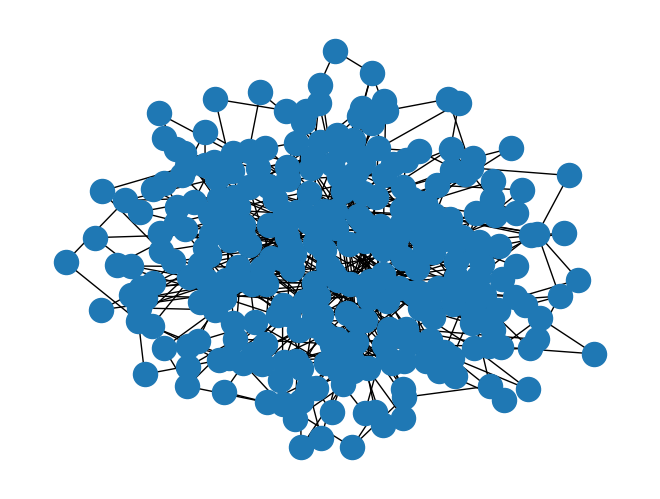

In [4]:
import networkx as nx

edge_list_file = "300 y = 2.255.edgelist"
#edge_list_file = "1000 y = 2.255.edgelist"
G1 = nx.read_edgelist(edge_list_file)
nx.draw(G1)



# Нахождение параметров сети

In [ ]:
from numpy import linalg as LA
G=G1
N=len(G)
A = nx.adjacency_matrix(G)
Matrix = [[0 for j in range(N)] for i in range(N)]

for i in range(N):
    for j in range(N):
        Matrix[i][j] = A[i, j]

eg = LA.eigvals(Matrix)

k1p = 0
k1mean = []
for i in range(N):
    k1p = 0
    for j in range(N):
        k1p += A[i, j]
    k1mean.append(k1p)
k2mean = [x**2 for x in k1mean]
k1 = sum(k1mean)/len(k1mean)
k2 = sum(k2mean)/len(k2mean)

zeta = k2/k1
maxk = max(k1mean)
mink = min(k1mean)
print('<k> - ', k1 , 'ζ-', zeta, 'kmax - ', maxk, 'kmin-', mink )
#print(eg)

<k> -  3.994 ζ- 6.678517776664997 kmax -  32 kmin- 2


# Визуализация графа с мерой центальности

In [ ]:
import networkx as nx
import random as rand
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.colors as mcolors

%matplotlib inline

def draw(G, pos, measures, measure_name):
    plt.figure(figsize=(15, 15))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


In [ ]:
min(nx.eigenvector_centrality(G1).values())

0.0007910204455361161

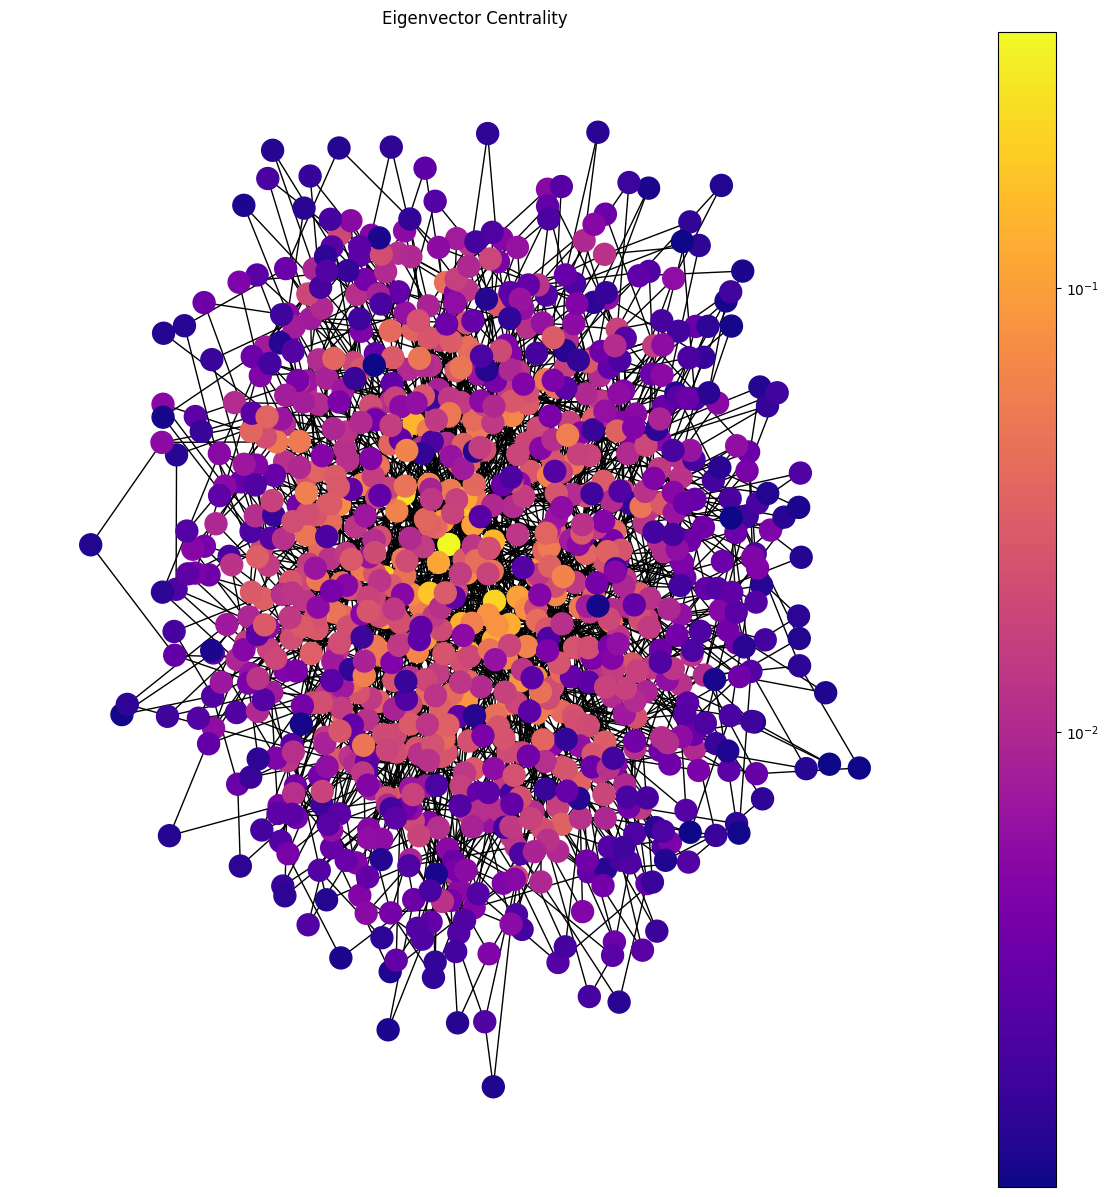

In [ ]:
draw(G1, nx.spring_layout(G1, seed=675), nx.eigenvector_centrality(G1), 'Eigenvector Centrality')

# Нарисовать с выделением хабов

In [ ]:
import networkx as nx
import random as rand
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

def draw_adaptive(G, pos, measures, measure_name):
    plt.figure(figsize=(10, 10))
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    eigenvalues = np.linalg.eigvals(adjacency_matrix)
    edge_importance = [abs(eigenvalues[int(u)] + eigenvalues[int(v)] if int(u) < len(eigenvalues) and int(v) < len(eigenvalues) else 0) for u, v in G.edges()]
    node_sizes = [d * 800 for d in list(measures.values())]  # Увеличьте размер узла в зависимости от его степени

    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, width=0.5)


    plt.figure(figsize=(10, 10))
    #plt.title(measure_name)
    min_value = min(measures.values())
    max_value = min(measures.values())

    plt.colorbar(nodes, orientation='horizontal')

    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np
G = G1
A = nx.adjacency_matrix(G)
eg,v = np.linalg.eig(A.toarray())
max_eigenvalue_index = np.argmax(eg)
max_eigenvector = np.abs(v[:, max_eigenvalue_index])
eigenvector_dict = {str(i + 1): component for i, component in enumerate(max_eigenvector)}


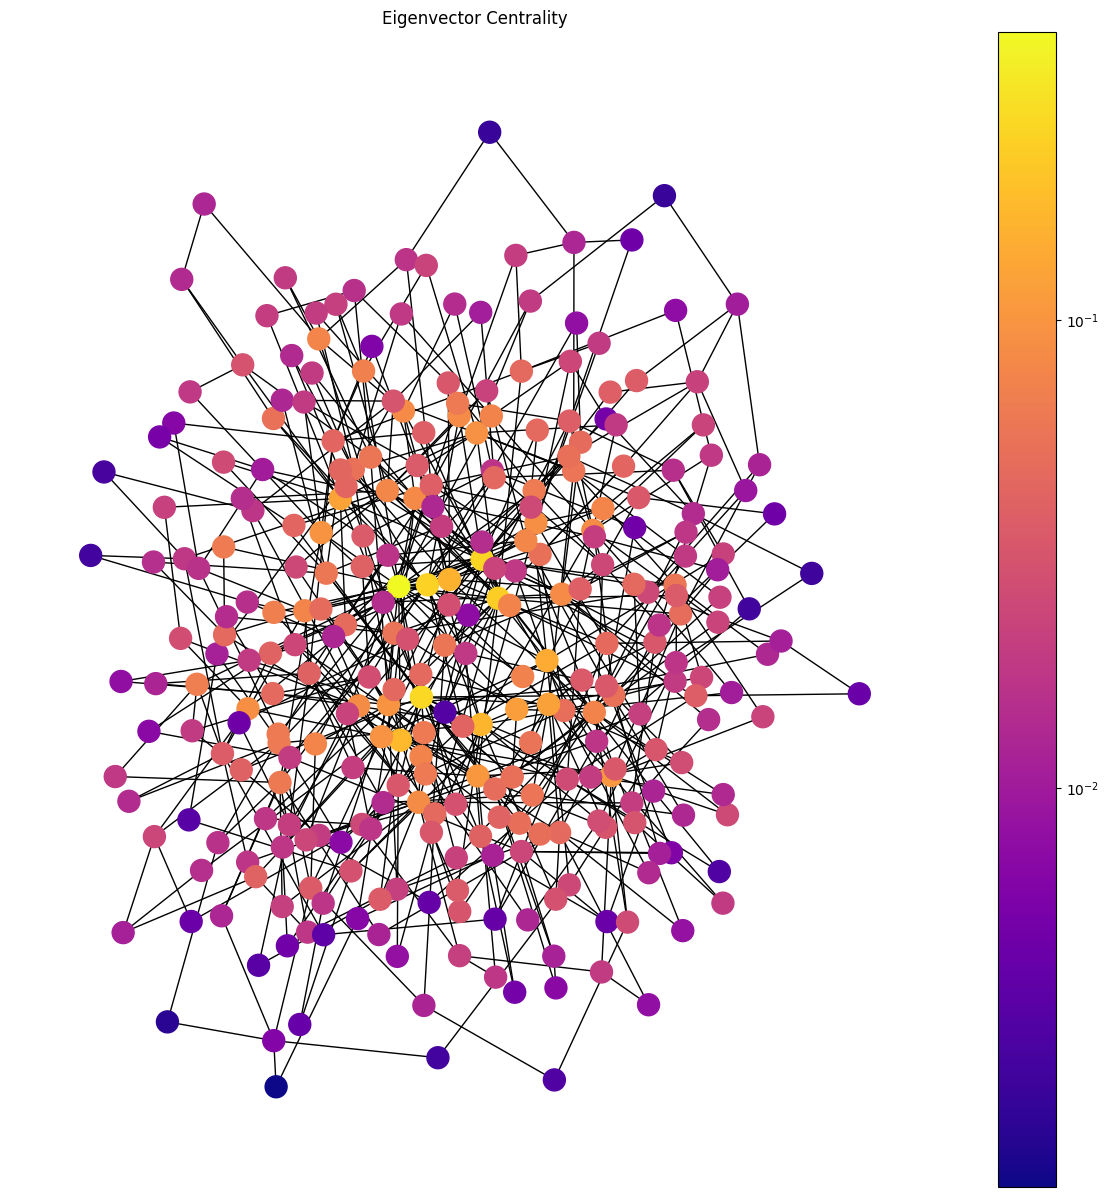

In [ ]:
draw(G1, nx.spring_layout(G1, seed=675), eigenvector_dict, 'Eigenvector Centrality')

Проверка ранжирования узлов по мере центральности

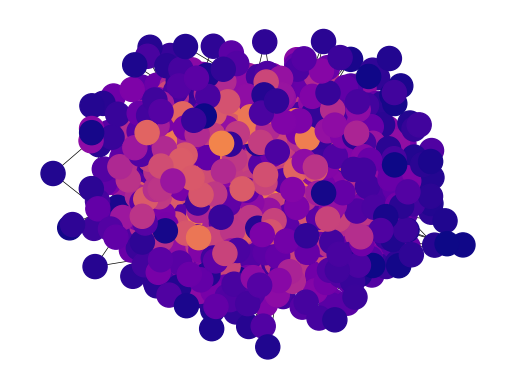

In [ ]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G1, seed=675)
node_sizes = [d * 800 for d in list(eigenvector_dict.values())]  # Увеличьте размер узла в зависимости от его степени

nodes = nx.draw_networkx_nodes(G, pos,  cmap=plt.cm.plasma,
                                node_color=list(eigenvector_dict.values()),
                                nodelist=eigenvector_dict.keys())
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
# labels = nx.draw_networkx_labels(G, pos)
edges = nx.draw_networkx_edges(G, pos, width=0.5)


#plt.figure(figsize=(10, 10))
#plt.title(measure_name)
min_value = min(eigenvector_dict.values())
max_value = max(eigenvector_dict.values())

#plt.colorbar(nodes, orientation='horizontal')

plt.axis('off')
plt.show()

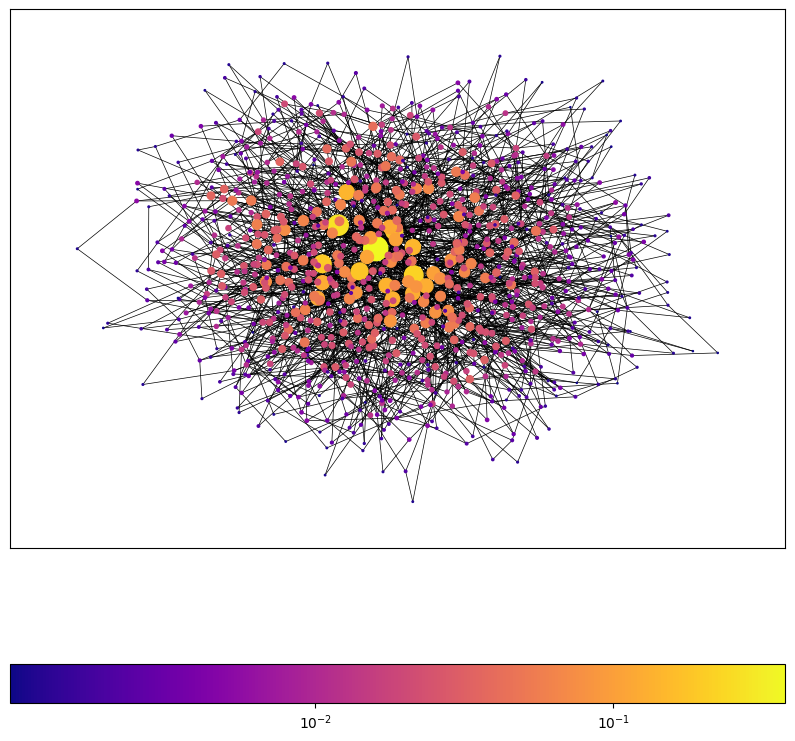

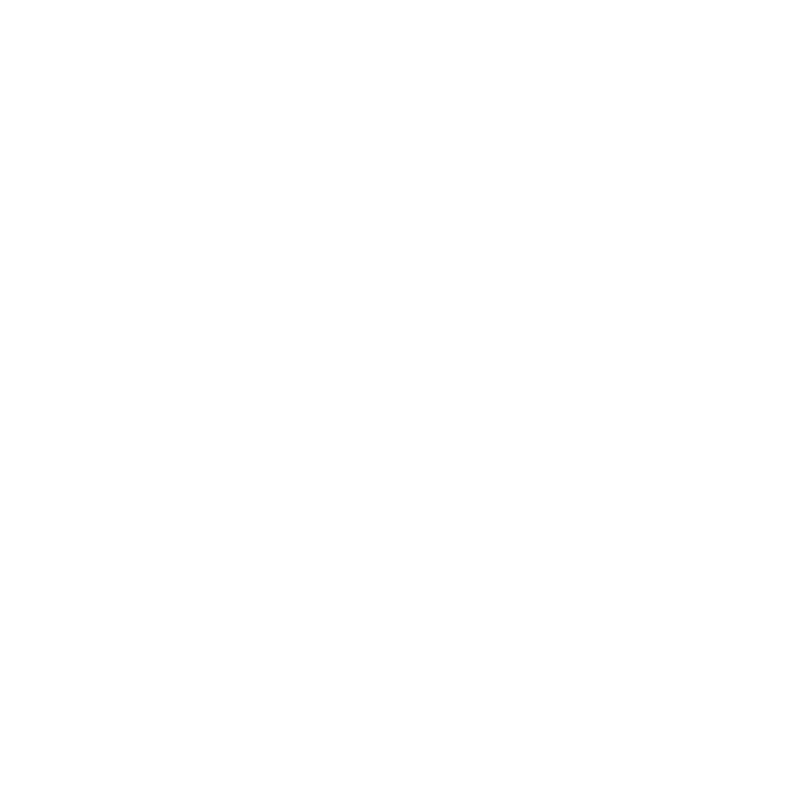

In [ ]:
draw_adaptive(G1, nx.spring_layout(G1, seed=675), nx.eigenvector_centrality(G1), 'Eigenvector Centrality')

In [ ]:
draw_adaptive(G1, nx.spring_layout(G1, seed=675), nx.eigenvector_centrality(G1), 'Eigenvector Centrality')

In [ ]:
import networkx as nx
import random as rand
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# for Notebook
%matplotlib inline

def draw_adaptive_all(G, pos, measures, measure_name):
    plt.figure(figsize=(10, 10))
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    eigenvalues = np.linalg.eigvals(adjacency_matrix)
    edge_importance = [abs(eigenvalues[int(u)] + eigenvalues[int(v)] if int(u) < len(eigenvalues) and int(v) < len(eigenvalues) else 0) for u, v in G.edges()]
    node_sizes = [d * 10 for d in dict(G.degree()).values()]  # Увеличьте размер узла в зависимости от его степени

    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, width=edge_importance, edge_color='gray', alpha=0.6)

    #plt.title(measure_name)
    #plt.colorbar(nodes)

    plt.axis('off')
    plt.show()

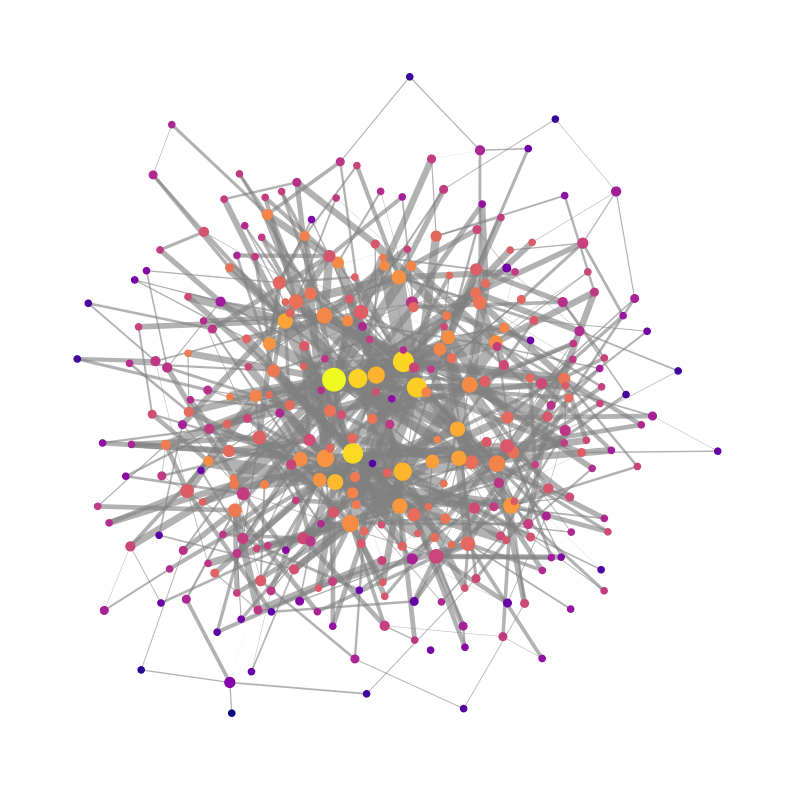

In [ ]:
draw_adaptive_all(G1, nx.spring_layout(G1, seed=675), nx.eigenvector_centrality(G1), 'Eigenvector Centrality')

# Нахождение собственных частот двумерного квантового материала

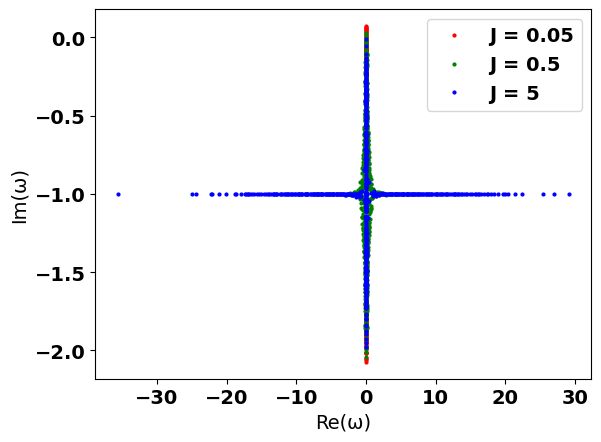

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 5 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [1 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]
# Gamma = [0 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G = G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

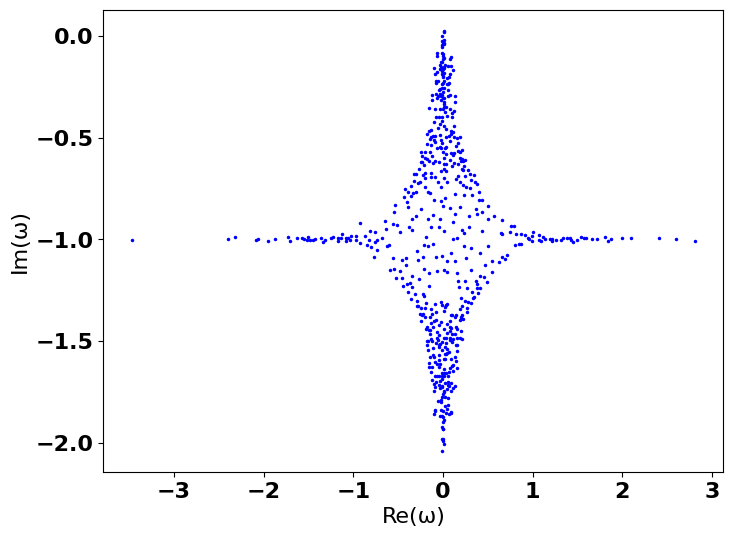

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
# plt.legend()
plt.show()

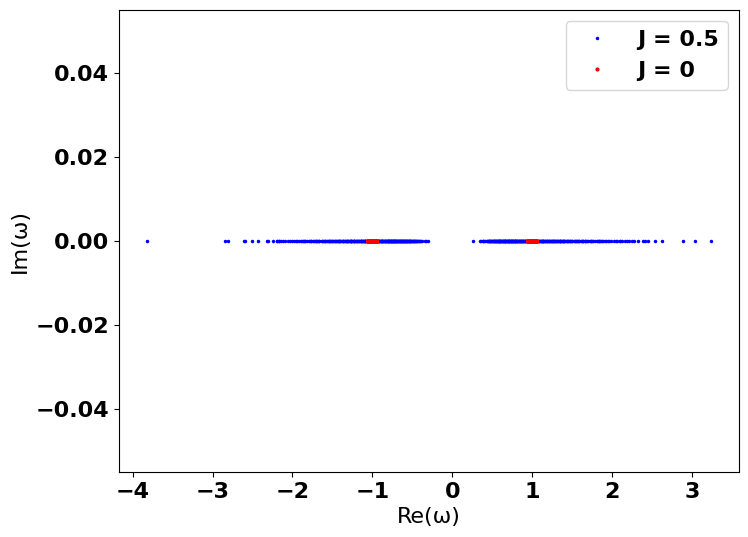

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
plt.legend()
plt.show()

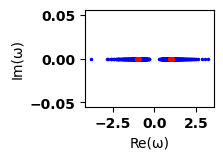

In [ ]:
plt.figure(figsize=(1.66, 1.25))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
# plt.legend()
plt.show()

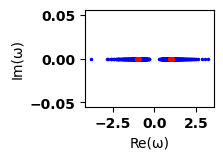

In [ ]:
plt.figure(figsize=(1.66, 1.25))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
# plt.legend()
plt.show()

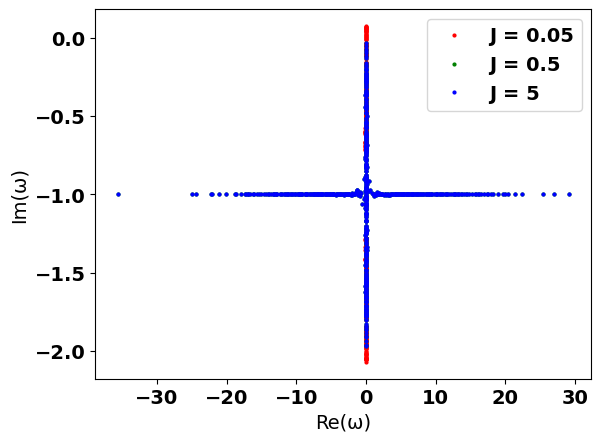

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 5 # J_i_2 + J_r
J_3 = 5 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [1 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]
# Gamma = [0 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

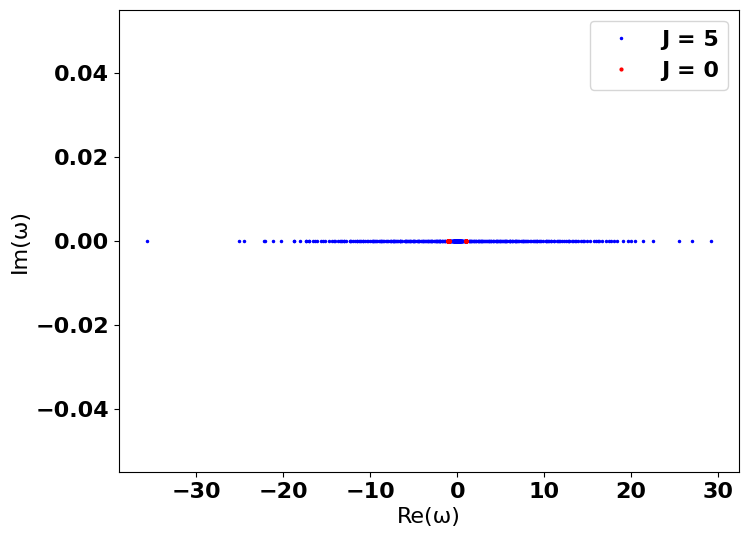

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
plt.legend()
plt.show()

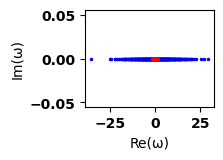

In [ ]:
plt.figure(figsize=(1.66, 1.25))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
# plt.legend()
plt.show()

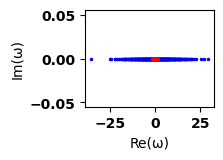

In [ ]:
plt.figure(figsize=(1.66, 1.25))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
# plt.legend()
plt.show()

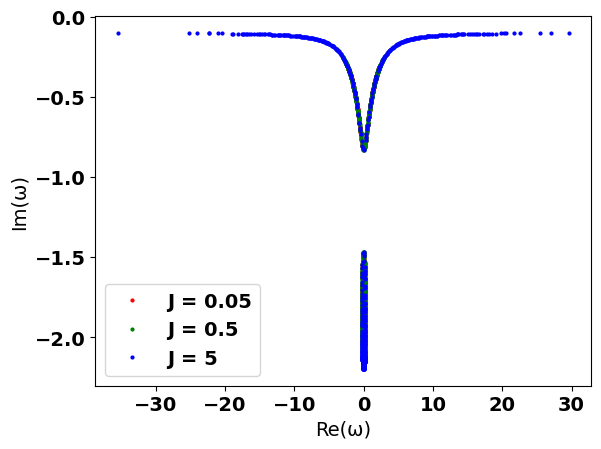

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 5 # J_i_3 +J_r
q = 1
sigma_0_z = [-1 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-2, 2) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [0.1 for i in range(N)]
# Gamma = [random.uniform(0.2, 0.4) for i in range(N)]
Gamma = [2.2 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

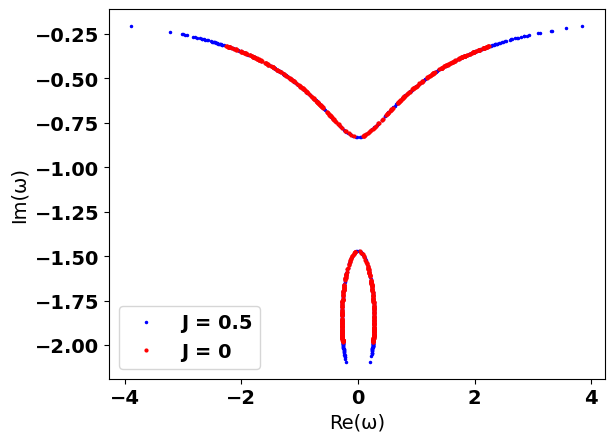

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 1)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-1,1)
plt.legend()
plt.show()



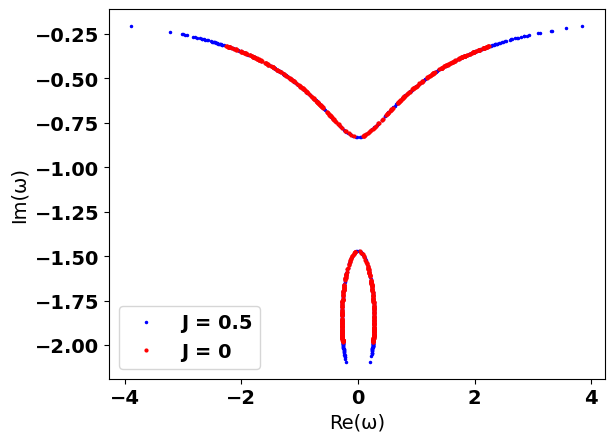

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 1)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-1,1)
plt.legend()
plt.show()


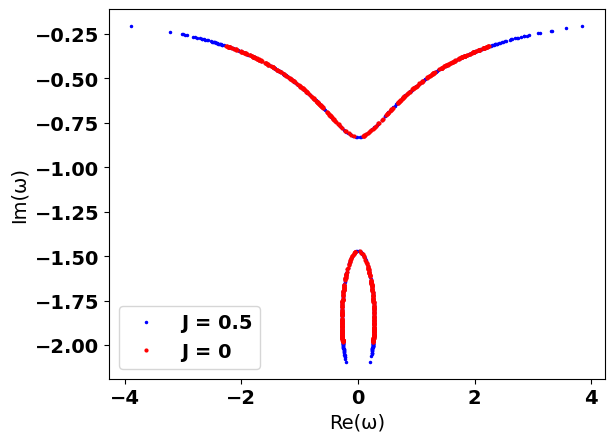

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 1)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-1,1)
plt.legend()
plt.show()



In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 5 # J_i_3 +J_r
q = 1
sigma_0_z = [0.2 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [0.3 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]
# Gamma = [0.3 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * q
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * q
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * q


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

KeyboardInterrupt: ignored

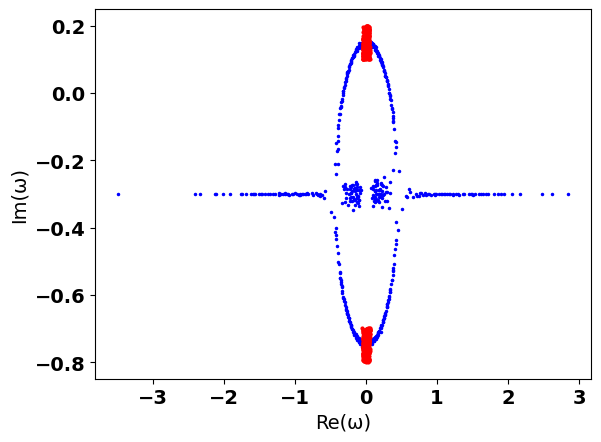

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)

plt.plot(reg2, ieg2, 'bo', label='J = 0.5', markersize=1.5)
plt.plot(reg, ieg, 'ro', label='J = 0', markersize=2)
# plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-3,3)
# plt.legend()
plt.show()

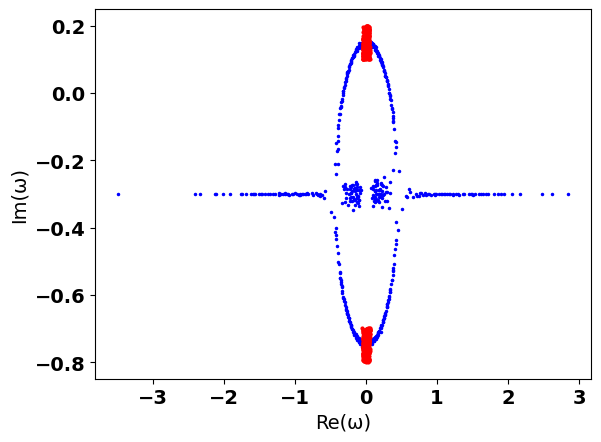

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)

plt.plot(reg2, ieg2, 'bo', label='J = 0.5', markersize=1.5)
plt.plot(reg, ieg, 'ro', label='J = 0', markersize=2)
# plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-3,3)
# plt.legend()
plt.show()

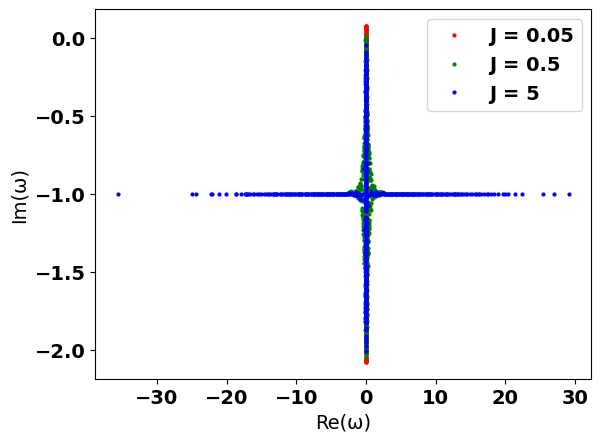

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 5 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [1.0 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]
# Gamma = [0.6 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

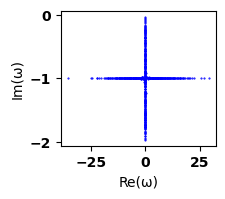

In [ ]:
plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 0.2)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=0.5,  alpha = 1)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-0.1,0.1)
# plt.legend()
plt.show()

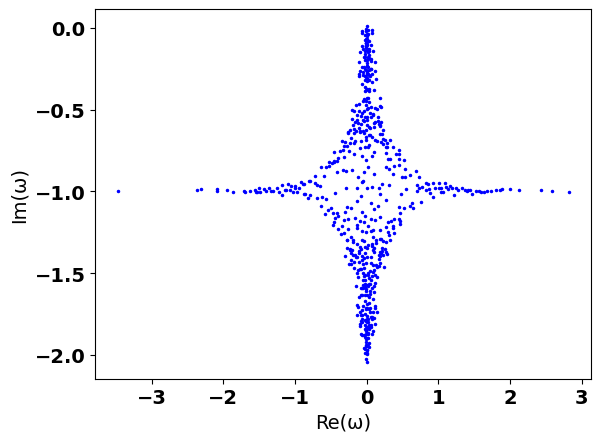

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)

plt.plot(reg2, ieg2, 'bo', label='J = 0.5', markersize=1.5)
# plt.plot(reg, ieg, 'ro', label='J = 0', markersize=2)
# plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-0.5,0.5)
# plt.ylim(-1.2,-0.8)
# plt.legend()
plt.show()

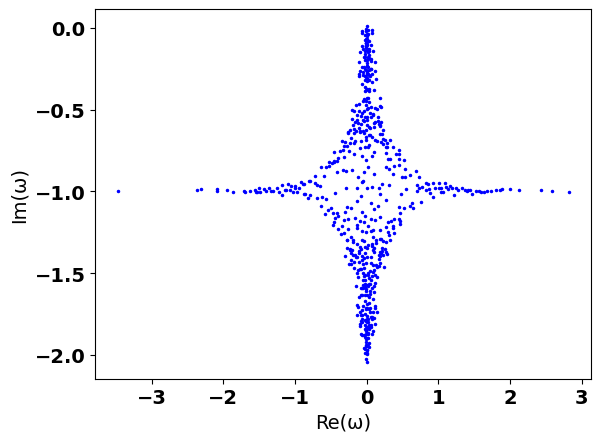

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)

plt.plot(reg2, ieg2, 'bo', label='J = 0.5', markersize=1.5)
# plt.plot(reg, ieg, 'ro', label='J = 0', markersize=2)
# plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-3,3)
# plt.legend()
plt.show()

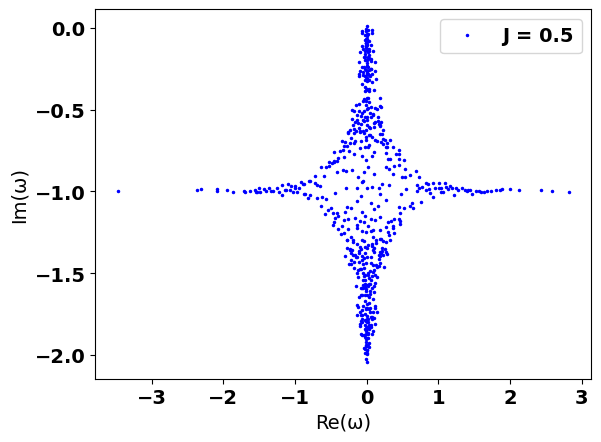

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)

plt.plot(reg2, ieg2, 'bo', label='J = 0.5', markersize=1.5)
# plt.plot(reg, ieg, 'ro', label='J = 0', markersize=2)
# plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-3,3)
plt.legend()
plt.show()

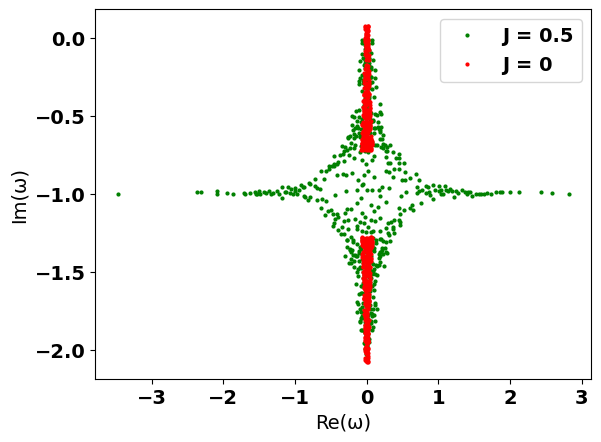

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 5', markersize=2, alpha = 1)
plt.plot(reg2, ieg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-1,1)
plt.legend()
plt.show()



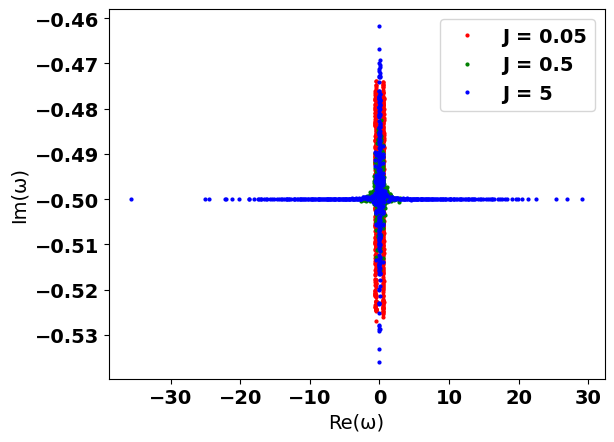

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 5 # J_i_3 +J_r
q = 1
sigma_0_z = [-0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [0.5 for i in range(N)]
Gamma = [random.uniform(0.45, 0.55) for i in range(N)]
# Gamma = [0.5 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

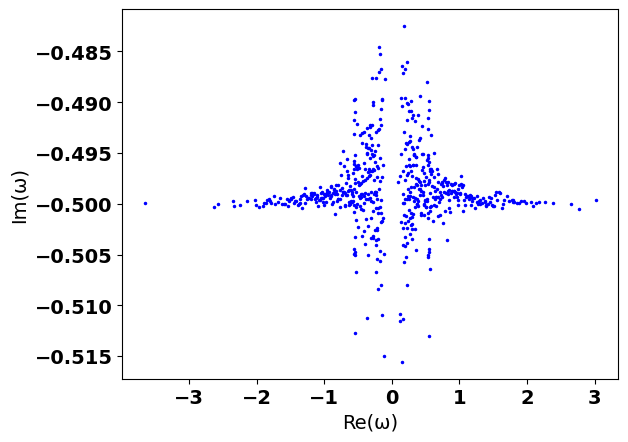

In [ ]:
plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)

plt.plot(reg2, ieg2, 'bo', label='J = 0.5', markersize=1.5)
# plt.plot(reg, ieg, 'ro', label='J = 0', markersize=2)
# plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.xlim(-3,3)
# plt.legend()
plt.show()

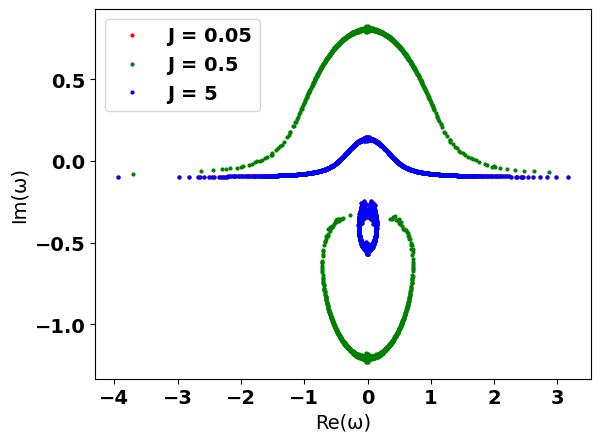

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 2 # J_i_3 +J_r
q = 1
sigma_0_z = [0.1 for i in range(N)]
sigma_0_z_1 = [1 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

# kappa = [0.1 for i in range(N)]
# Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

kappa = [0.1 for i in range(N)]
Gamma = [random.uniform(0.2, 0.4) for i in range(N)]


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_2 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z_1[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

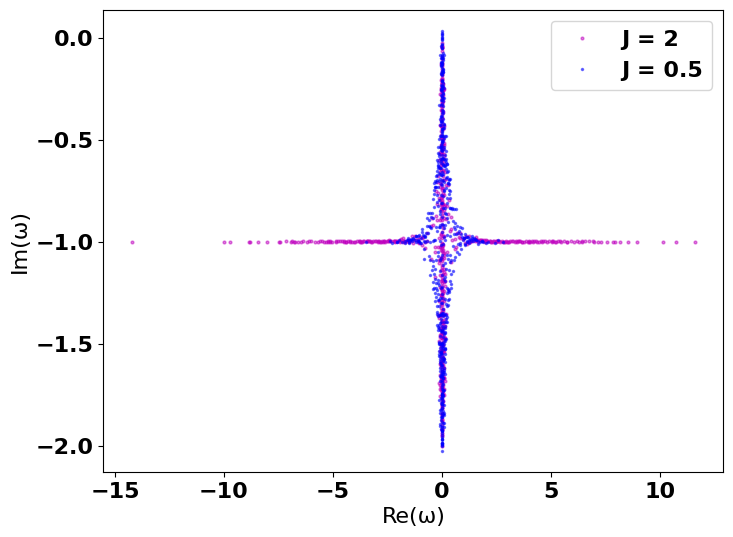

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 0.5)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-1,1)
plt.legend()
plt.show()

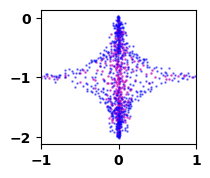

In [ ]:
plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=1, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=0.75,  alpha = 0.5)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

# plt.xlabel('Re(ω)')
# plt.ylabel('Im(ω)')

plt.xlim(-1,1)
# plt.legend()
plt.show()

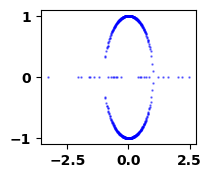

In [ ]:
plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
# plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=1, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=0.75,  alpha = 0.5)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

# plt.xlabel('Re(ω)')
# plt.ylabel('Im(ω)')

# plt.xlim(-0.5,0.5)
# plt.legend()
plt.show()

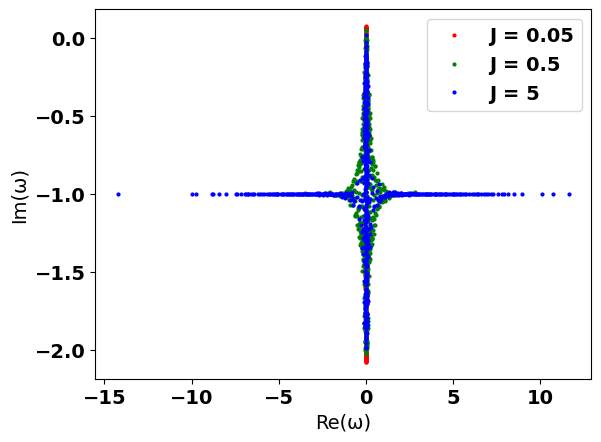

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 2 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [1.0 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]
# Gamma = [0.5 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 5', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

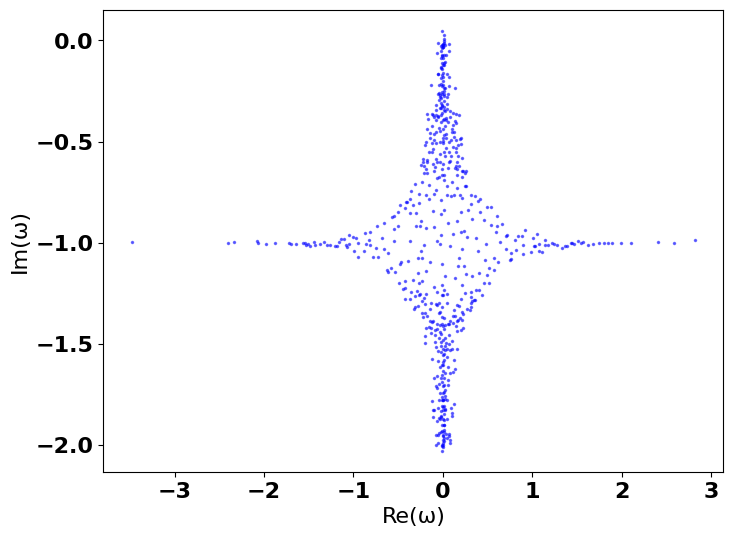

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
# plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=1.5,  alpha = 0.5)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
# plt.xlim(-1,1)
# plt.legend()
plt.show()

In [ ]:
"""Ввод библиотек"""
import math
import random

import numpy as np
from numpy import linalg as LA
from scipy import linalg as LA2
import matplotlib.pyplot as plt
import networkx as nx
"""Ввод начальных условий и генерация сети"""
N = len(G1)
m = 2
p = 0.044
# Gamma = 0.5
#J = 0.6 +0.1j
sigm = np.arange(0.001, 0.99, (0.99 - 0.001) / 1000)
# sigm = np.arange(0.1, 0.99, (0.99 - 0.1) / 100)
# sigm = np.arange(0.001, 0.99, 0.01)
logsigm = np.log10(abs(sigm))
seedn = 18
#24

# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
# J = 0.05#J_i + J_r
# J_2 = 0.5#J_i_2 + J_r
# J_3 = 5# J_i_3 +J_r

J = 0.5
q = 1
#sigma_0_z = [0.5 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
# kappa = [0.1 for i in range(N)]
# Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

kappa = [1.0 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]

# kappa = [0 for i in range(N)]
# Gamma = [0 for i in range(N)]


"""Иницилизация сети"""


G = G1
#G= nx.barabasi_albert_graph(N, m, seed=seedn)
A = nx.adjacency_matrix(G)
#plt.figure(3)
#a = nx.draw(G,with_labels = True)

"""Заполнение матрицы коэффициентов"""

solr = []
soli = []

Matrixcoef = [[0 for j in range(2*N)] for i in range(2*N)]

for i in range(0, N):
  for j in range(0, N):
    Matrixcoef[i][j] = 1j*J*A[i, j]
  Matrixcoef[i][i] = -1j*Delta[i]-kappa[i]
  Matrixcoef[i][i+N]=-1j
  Matrixcoef[i+N][i+N] = -Gamma[i-N]

for z in range(len(sigm)):
    # Matrixcoef = [[0 for j in range(2*N)] for i in range(2*N)]

    # for i in range(0, N):
    #     for j in range(0, N):
    #         Matrixcoef[i][j] = 1j*J*A[i, j]

    # for i in range(0, N):
    #     Matrixcoef[i][i] = -1j*Delta[i]-kappa[i]

    # for i in range(0, N):
    #     Matrixcoef[i][i+N]=-1j

    for i in range(N, 2*N):
        Matrixcoef[i][i-N] = 1j*sigm[z]

    # for i in range(N, 2*N):
    #     Matrixcoef[i][i] = -Gamma[i-N]

        """Решение"""
    eg = LA.eigvals(Matrixcoef)*(1j)


    reg = np.sort(eg.real)
    ieg = np.sort(eg.imag)

    #print(type(reg))

    for i in range (len(ieg)):
        if abs(ieg[i]) < 1e-6:
            ieg[i]=0

    sigmas = [logsigm[z]]*len(reg)

    solr.append(reg)
    soli.append(ieg)

    # plt.figure(1)

    # font = {'weight': 'bold',
    #         'size': 16}
    # plt.rc('font', **font)

    # plt.scatter(sigmas, reg)
    # plt.xlabel("Lg(σ)")
    # plt.ylabel("Re(ω)")
    # plt.figure(2)
    # plt.scatter(sigmas, ieg)
    # plt.xlabel("Lg(σ)")
    # plt.ylabel("Im(ω)")

    #plt.legend()



newrsol = np.array(solr)
newisol = np.array(soli)

#for i in range (2*N):
#    newrsol[i] = np.sort(newrsol[i])
 #   newisol[i] = np.sort(newisol[i])


newrsol = newrsol.transpose()
newisol = newisol.transpose()
#print(newisol[0])


#print(newisol[0])

for i  in range (2*N):
    plt.figure(4)
    plt.plot(logsigm, newrsol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Re(ω)")
    plt.figure(5)
    plt.plot(logsigm, newisol[i])
    plt.xlabel("Lg($σ^z$)")
    # xlim(-1,0)
    plt.ylabel("Im(ω)")


plt.show()


In [ ]:
for i  in range (2*N):
    plt.figure(4)
    plt.plot(logsigm, newrsol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Re(ω)")
    plt.figure(5)
    plt.plot(logsigm, newisol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Im(ω)")


plt.show()


In [ ]:
for i  in range (2*N):
    plt.figure(4)
    plt.plot(logsigm, newrsol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Re(ω)")
    plt.figure(5)
    plt.plot(logsigm, newisol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Im(ω)")


plt.show()


In [ ]:
for i  in range (2*N):
    plt.figure(4)
    plt.plot(logsigm, newrsol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Re(ω)")
    plt.figure(5)
    plt.plot(logsigm, newisol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Im(ω)")


plt.show()


In [ ]:
for i  in range (2*N):
    plt.figure(4)
    plt.plot(logsigm, newrsol[i])
    plt.xlabel("Lg($σ^z$)")
    plt.ylabel("Re(ω)")
    plt.figure(5)
    plt.plot(logsigm, newisol[i])
    plt.xlabel("Lg($|σ^z|$)")
    xlim(-1,0)
    plt.ylabel("Im(ω)")


plt.show()

In [ ]:
print(abs(-1))

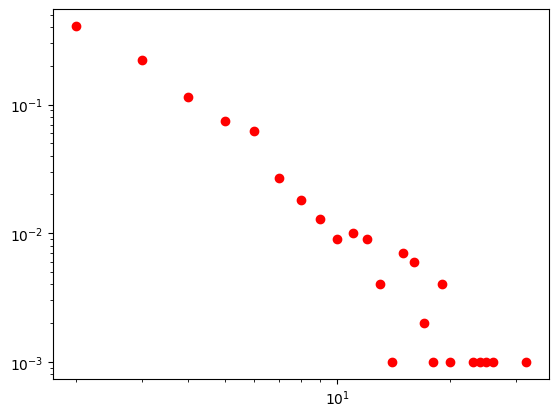

In [ ]:
from collections import Counter
deg=dict(G1.degree()).values()
deg_distri=Counter(deg)
x=[]
y=[]
for i in sorted(deg_distri):
    x.append(i)
    y.append(deg_distri[i]/len(G1))

exponent = 2.255
m = 2
line1_y = 2 * m**(exponent - 1) * np.array(x)**(-exponent)
#line2_y = 2 * m**2 * x**(-3)
out_degree_dist = plt.loglog(x, y, 'o', label='η = 2.3', color='red')
#plt.loglog(x, line1_y, color='red', label='Line 1')
plt.show()

# Спектр

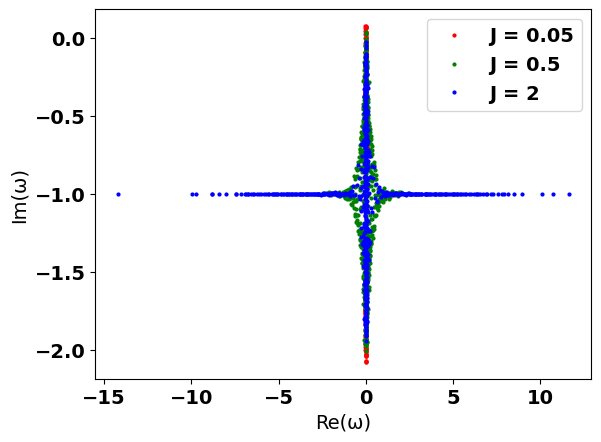

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 2 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]
#Delta = [0 for i in range(N)]
# kappa = [0.1 for i in range(N)]
kappa = [1 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]
#Gamma = [0 for i in range(N)]

# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)

# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    Matrixcoef[i, i + N] = -1j * q
    Matrixcoef2[i, i + N] = -1j * q
    Matrixcoef3[i, i + N] = -1j * q


for i in range(N, 2 * N):
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N]
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

for i in range(len(ieg2)):
    if abs(ieg2[i]) < 1e-6:
        ieg2[i] = 0

for i in range(len(ieg3)):
    if abs(ieg3[i]) < 1e-6:
        ieg3[i] = 0
for i in range(len(ieg)):
    if abs(ieg[i]) < 1e-6:
        ieg[i] = 0

plt.figure(2)
font = {'weight': 'bold', 'size': 14}
plt.rc('font', **font)
plt.plot(reg, ieg, 'ro', label='J = 0.05', markersize=2)
plt.plot(reg2, ieg2, 'go', label='J = 0.5', markersize=2)
plt.plot(reg3, ieg3, 'bo', label='J = 2', markersize=2)
plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()

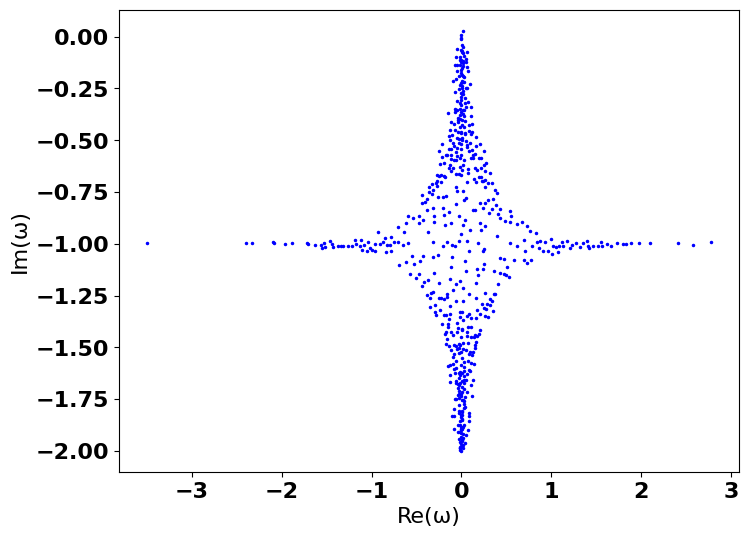

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'bo',label='J = 2', markersize=2, alpha = 1)
plt.plot(reg2, ieg2, 'bo',label='J = 0', markersize=1.5,  alpha = 1)
# plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-3.5,3.5)
# plt.legend()
plt.show()

# С изменением g (p)

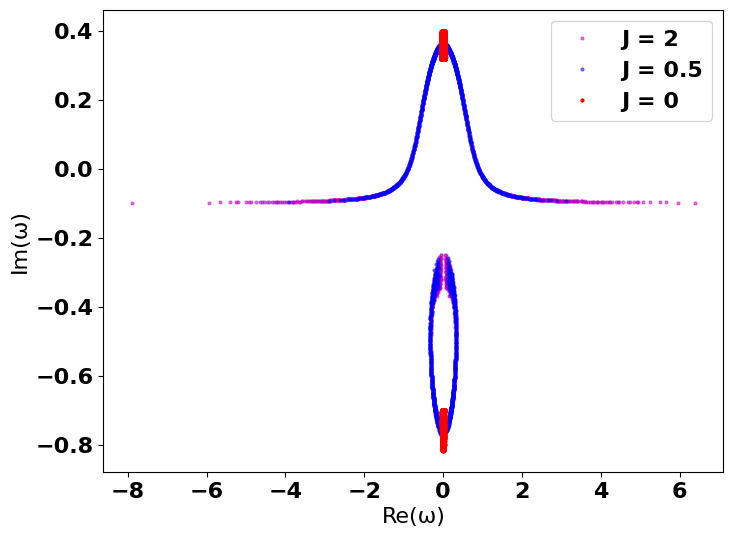

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 1 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

kappa = [0.1 for i in range(N)]
Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

# kappa = [0 for i in range(N)]
# Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
k  = np.sum(A, axis=1)
# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    p = q# * 3.27 #*k[i] # * np.sqrt(k[i])
    Matrixcoef[i, i + N] = -1j * p
    Matrixcoef2[i, i + N] = -1j * p
    Matrixcoef3[i, i + N] = -1j * p


for i in range(N, 2 * N):
    p = q #* 3.27 #*k[i-N] #* np.sqrt(k[i-N])
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * p
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * p
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * p


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

# for i in range(len(ieg2)):
#     if abs(ieg2[i]) < 1e-6:
#         ieg2[i] = 0

# for i in range(len(ieg3)):
#     if abs(ieg3[i]) < 1e-6:
#         ieg3[i] = 0
# for i in range(len(ieg)):
#     if abs(ieg[i]) < 1e-6:
#         ieg[i] = 0

plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()



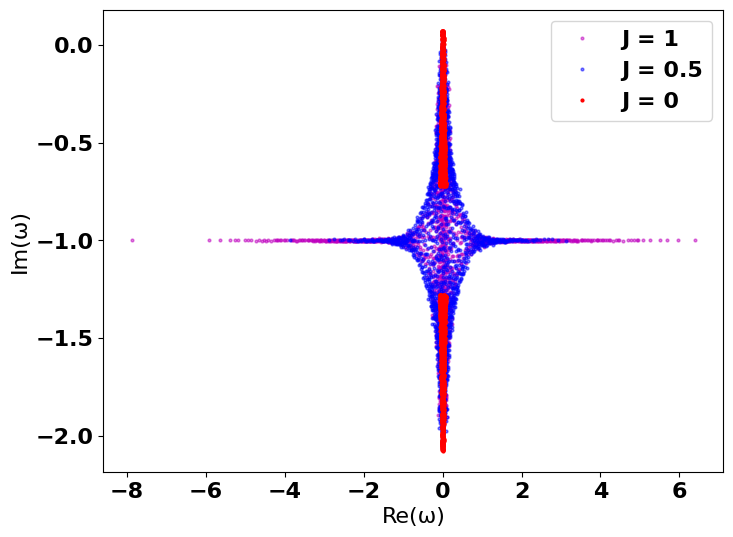

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 1 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

kappa = [1 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]

# kappa = [0 for i in range(N)]
# Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
k  = np.sum(A, axis=1)
# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    p = q# * 3.27 #*k[i] # * np.sqrt(k[i])
    Matrixcoef[i, i + N] = -1j * p
    Matrixcoef2[i, i + N] = -1j * p
    Matrixcoef3[i, i + N] = -1j * p


for i in range(N, 2 * N):
    p = q #* 3.27 #*k[i-N] #* np.sqrt(k[i-N])
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * p
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * p
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * p


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

# for i in range(len(ieg2)):
#     if abs(ieg2[i]) < 1e-6:
#         ieg2[i] = 0

# for i in range(len(ieg3)):
#     if abs(ieg3[i]) < 1e-6:
#         ieg3[i] = 0
# for i in range(len(ieg)):
#     if abs(ieg[i]) < 1e-6:
#         ieg[i] = 0

plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'mo',label='J = 1', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()



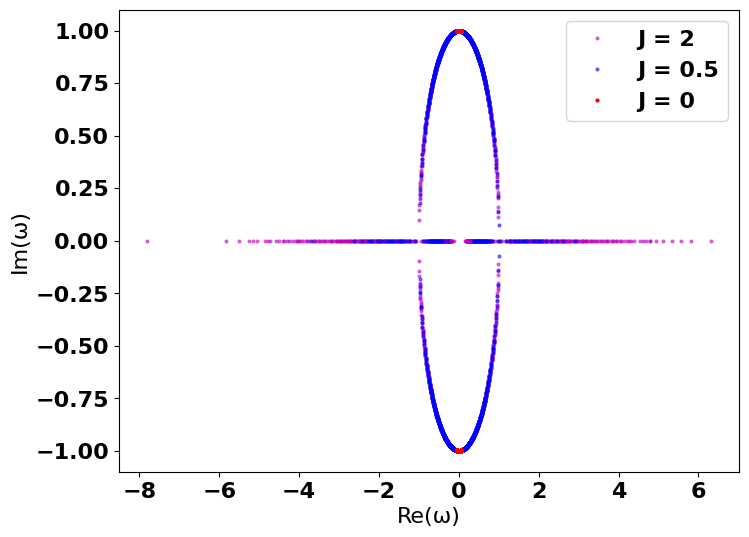

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 1 # J_i_3 +J_r
q = 1
sigma_0_z = [1 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

# kappa = [0.1 for i in range(N)]
# Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

kappa = [0 for i in range(N)]
Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
k  = np.sum(A, axis=1)
# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_3 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    p = q# * 3.27 #*k[i] # * np.sqrt(k[i])
    Matrixcoef[i, i + N] = -1j * p
    Matrixcoef2[i, i + N] = -1j * p
    Matrixcoef3[i, i + N] = -1j * p


for i in range(N, 2 * N):
    p = q #* 3.27 #*k[i-N] #* np.sqrt(k[i-N])
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * p
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * p
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * p


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

# for i in range(len(ieg2)):
#     if abs(ieg2[i]) < 1e-6:
#         ieg2[i] = 0

# for i in range(len(ieg3)):
#     if abs(ieg3[i]) < 1e-6:
#         ieg3[i] = 0
# for i in range(len(ieg)):
#     if abs(ieg[i]) < 1e-6:
#         ieg[i] = 0

plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
plt.legend()
plt.show()



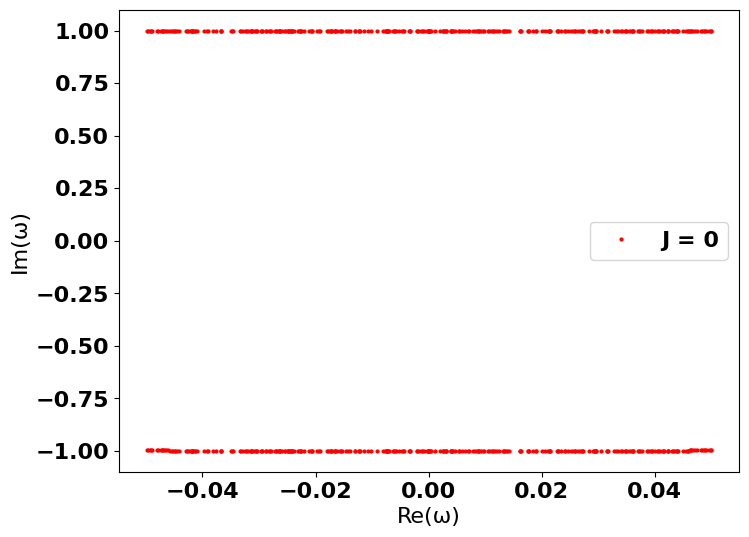

In [ ]:
plt.figure(figsize=(8, 6))
font = {'weight': 'bold', 'size': 16}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=4, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=4,  alpha = 0.5)
plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-7,7)
plt.legend()
plt.show()


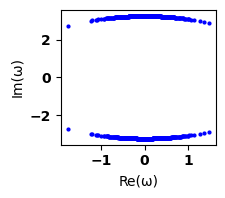

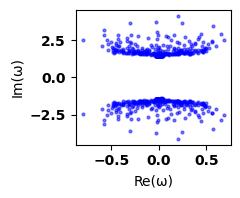

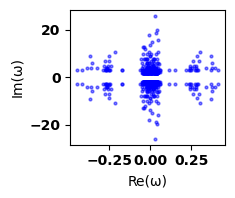

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 2 # J_i_3 +J_r
q = 1
sigma_0_z = [1 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

# kappa = [0.1 for i in range(N)]
# Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

kappa = [0 for i in range(N)]
Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
k  = np.sum(A, axis=1)
# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_2 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    p = q# * 3.27 #*k[i] # * np.sqrt(k[i])
    Matrixcoef[i, i + N] = -1j * 3.246
    Matrixcoef2[i, i + N] = -1j * np.sqrt(k[i])
    Matrixcoef3[i, i + N] = -1j * k[i]


for i in range(N, 2 * N):
    p = q #* 3.27 #*k[i-N] #* np.sqrt(k[i-N])
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * 3.246
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * np.sqrt(k[i - N])
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * k[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

# for i in range(len(ieg2)):
#     if abs(ieg2[i]) < 1e-6:
#         ieg2[i] = 0

# for i in range(len(ieg3)):
#     if abs(ieg3[i]) < 1e-6:
#         ieg3[i] = 0
# for i in range(len(ieg)):
#     if abs(ieg[i]) < 1e-6:
#         ieg[i] = 0

plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
plt.plot(reg, ieg, 'bo', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()



plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()


plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'bo',markersize=2, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()



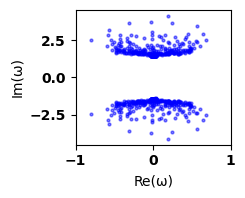

In [ ]:
plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
plt.xlim(-1,1)
#plt.legend()
plt.show()

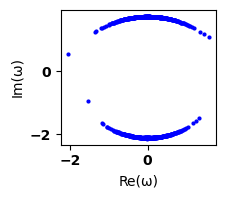

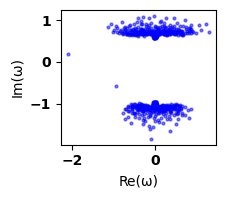

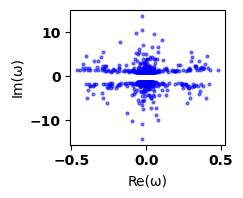

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 2 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

kappa = [0.1 for i in range(N)]
Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

# kappa = [0 for i in range(N)]
# Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
k  = np.sum(A, axis=1)
# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_2 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    p = q# * 3.27 #*k[i] # * np.sqrt(k[i])
    Matrixcoef[i, i + N] = -1j * 3.502
    Matrixcoef2[i, i + N] = -1j * np.sqrt(k[i])
    Matrixcoef3[i, i + N] = -1j * k[i]


for i in range(N, 2 * N):
    p = q #* 3.27 #*k[i-N] #* np.sqrt(k[i-N])
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * 3.502
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * np.sqrt(k[i - N])
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * k[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

# for i in range(len(ieg2)):
#     if abs(ieg2[i]) < 1e-6:
#         ieg2[i] = 0

# for i in range(len(ieg3)):
#     if abs(ieg3[i]) < 1e-6:
#         ieg3[i] = 0
# for i in range(len(ieg)):
#     if abs(ieg[i]) < 1e-6:
#         ieg[i] = 0

plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
plt.plot(reg, ieg, 'bo', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()



plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()


plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'bo',markersize=2, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()



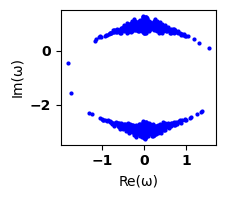

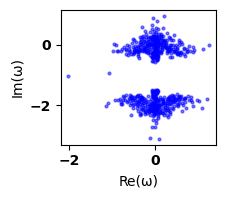

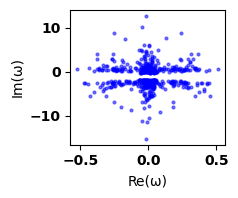

In [ ]:
import math
import random
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import networkx as nx

# Ввод начальных условий и генерация сети
N = len(G1)
m = 2
p = 0.044
# J_i = 0j
# J_i_2 = 0.05j
# J_i_3 = 0.5j
# J_r = 0.5
J = 0 # J_i + J_r
J_2 = 0.5 # J_i_2 + J_r
J_3 = 2 # J_i_3 +J_r
q = 1
sigma_0_z = [0.3 for i in range(N)]
#sigma_0_z = 0.1 #=np.random.normal(0, 1, 100)
Delta = [random.uniform(-0.1, 0.1) for i in range(N)]

kappa = [1 for i in range(N)]
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]

# kappa = [0 for i in range(N)]
# Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #


# Инициализация сети
#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
k  = np.sum(A, axis=1)
# Заполнение матрицы коэффициентов
Matrixcoef = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef2 = np.zeros((2 * N, 2 * N), dtype=complex)
Matrixcoef3 = np.zeros((2 * N, 2 * N), dtype=complex)


for i in range(N):
    for j in range(N):
        Matrixcoef[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef2[i, j] = 1j * J_2 * A[i, j]
        Matrixcoef3[i, j] = 1j * J_2 * A[i, j]

for i in range(N):
    Matrixcoef[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef2[i, i] = -1j * Delta[i] - kappa[i]
    Matrixcoef3[i, i] = -1j * Delta[i] - kappa[i]


for i in range(N):
    p = q# * 3.27 #*k[i] # * np.sqrt(k[i])
    Matrixcoef[i, i + N] = -1j * 3.47
    Matrixcoef2[i, i + N] = -1j * np.sqrt(k[i])
    Matrixcoef3[i, i + N] = -1j * k[i]


for i in range(N, 2 * N):
    p = q #* 3.27 #*k[i-N] #* np.sqrt(k[i-N])
    Matrixcoef[i, i - N] = 1j * sigma_0_z[i - N] * 3.47
    Matrixcoef2[i, i - N] = 1j * sigma_0_z[i - N] * np.sqrt(k[i - N])
    Matrixcoef3[i, i - N] = 1j * sigma_0_z[i - N] * k[i - N]


for i in range(N, 2 * N):
    Matrixcoef[i, i] = -Gamma[i - N]
    Matrixcoef2[i, i] = -Gamma[i - N]
    Matrixcoef3[i, i] = -Gamma[i - N]


# Решение

eg, v = np.linalg.eig(Matrixcoef)
eg = eg * 1j
eg2, v2 = np.linalg.eig(Matrixcoef2)
eg2 = eg2 * 1j
eg3, v3 = np.linalg.eig(Matrixcoef3)
eg3 = eg3 * 1j

reg = [x.real for x in eg]
ieg = [x.imag for x in eg]
reg2 = [x.real for x in eg2]
ieg2 = [x.imag for x in eg2]

reg3 = [x.real for x in eg3]
ieg3 = [x.imag for x in eg3]

# for i in range(len(ieg2)):
#     if abs(ieg2[i]) < 1e-6:
#         ieg2[i] = 0

# for i in range(len(ieg3)):
#     if abs(ieg3[i]) < 1e-6:
#         ieg3[i] = 0
# for i in range(len(ieg)):
#     if abs(ieg[i]) < 1e-6:
#         ieg[i] = 0

plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
plt.plot(reg, ieg, 'bo', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()



plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
#plt.plot(reg3, ieg3, 'mo',label='J = 2', markersize=2, alpha = 0.5)
plt.plot(reg2, ieg2, 'bo', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()


plt.figure(figsize=(2, 1.75))
font = {'weight': 'bold', 'size': 10}
plt.rc('font', **font)
plt.plot(reg3, ieg3, 'bo',markersize=2, alpha = 0.5)
#plt.plot(reg2, ieg2, 'bo',label='J = 0.5', markersize=2,  alpha = 0.5)
#plt.plot(reg, ieg, 'ro',  label='J = 0', markersize=2,  alpha = 1)

# plt.plot(ieg2, reg2, 'go',label='J = 0.5', markersize=2,  alpha = 1)
# plt.plot(ieg, reg, 'ro',  label='J = 0.05', markersize=2,  alpha = 1)

plt.xlabel('Re(ω)')
plt.ylabel('Im(ω)')
# plt.ylabel('Re(ω)')
# plt.xlabel('Im(ω)')
#plt.xlim(-1,1)
#plt.legend()
plt.show()



# Вычисление IPR

In [ ]:
def calculate_ipr(eigenvectors):
    ipr = np.sum(np.abs(eigenvectors) ** 4, axis=0)
    return ipr

def _get_field(eigenvectors, N, omega):
    print(len(eigenvectors))
    _E0 = [eigenvectors[j, :N] for j in range(2 * N)]
    _P0 = [eigenvectors[j, N:] for j in range(2 * N)]
    print(len(_E0))
    return _E0, _P0

In [ ]:
import numpy as np

def calculate_ipr_new(eigenvectors):

    sum_of_squared_amplitudes = np.sum(np.abs(eigenvectors) ** 2, axis=0)
    ipr = np.sum(np.abs(eigenvectors) ** 4, axis=0) / (sum_of_squared_amplitudes ** 2)

    return ipr


In [ ]:
len(ipr_E)

300

600
600


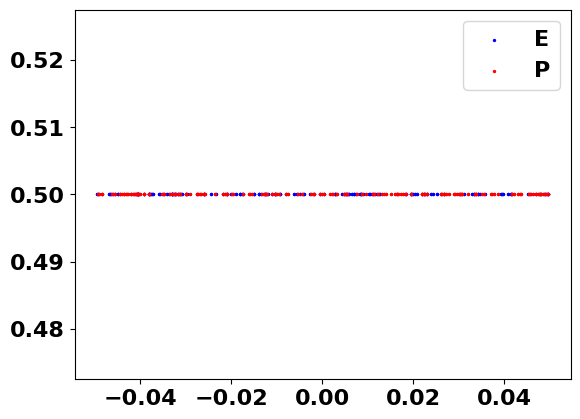

In [ ]:
E0, P0 = _get_field(eigenvectors=v, N=N, omega=eg)

ipr_E = calculate_ipr_new(E0)
ipr_P = calculate_ipr_new(P0)


plt.scatter(eg[:N], ipr_E, s = 2, color = 'b')
plt.scatter(eg[N:], ipr_P, s = 2, color = 'r')
plt.legend(['E', 'P'])

plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


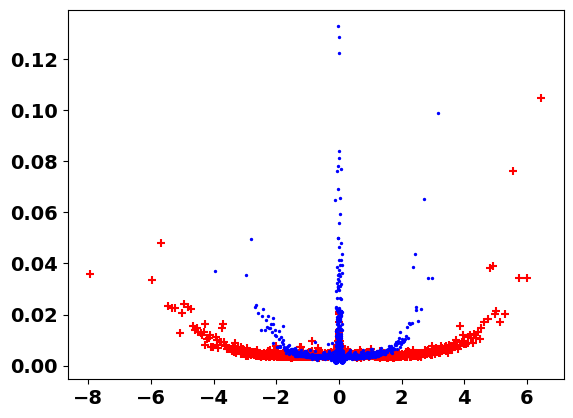

In [ ]:

eg0,v0 = np.linalg.eig(-A.toarray())

ipr2 = calculate_ipr_new(v)
ipr = calculate_ipr_new(v0)
plt.scatter(eg0, ipr,  color = 'r',marker= '+')
plt.scatter(eg, ipr2, s = 2, color = 'b')


plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


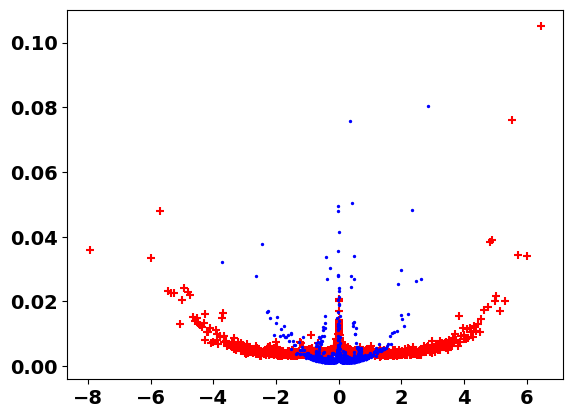

In [ ]:

eg0,v0 = np.linalg.eig(-A.toarray())

ipr2 = calculate_ipr_new(v2)
ipr = calculate_ipr_new(v0)
plt.scatter(eg0, ipr,  color = 'r',marker= '+')
plt.scatter(eg2, ipr2, s = 2, color = 'b')


plt.show()

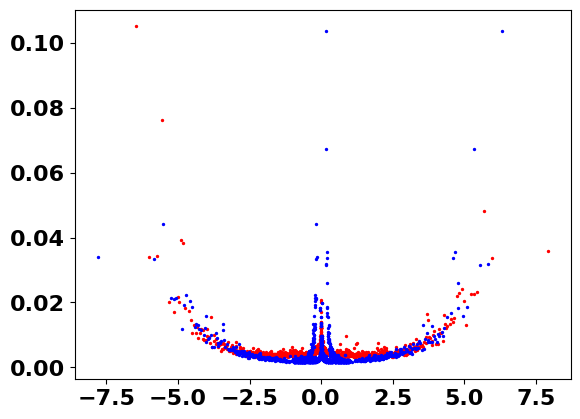

In [ ]:

eg,v = np.linalg.eig(A.toarray())

ipr2 = calculate_ipr_new(v3)
ipr = calculate_ipr_new(v)
plt.scatter(eg, ipr, s = 2, color = 'r')
plt.scatter(eg3, ipr2, s = 2, color = 'b')


plt.show()

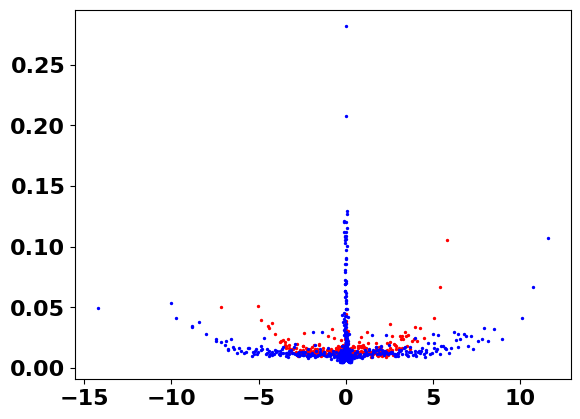

In [ ]:
len(ipr_E)

In [ ]:
E0, P0 = _get_field(eigenvectors=v2, N=N, omega=eg2)

ipr_E = (calculate_ipr_new(E0))
ipr_P = (calculate_ipr_new(P0))


plt.scatter(eg2, ipr_E, s = 2,color = 'b')
plt.scatter(eg2, ipr_P, s = 2, color = 'r')
plt.legend(['IPR(E)', 'IPR(P)'])

plt.show()

NameError: ignored

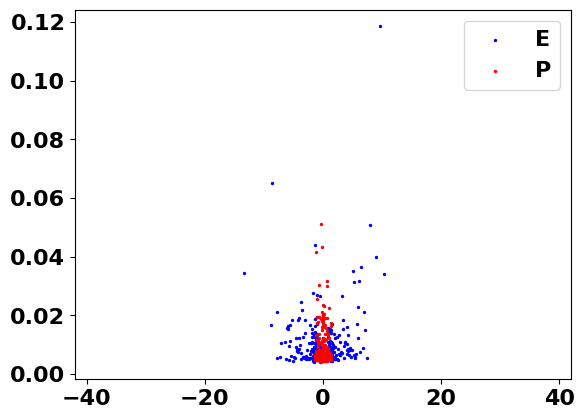

In [ ]:
E0, P0 = _get_field(eigenvectors=v3, N=N, omega=eg3)

ipr_E = calculate_ipr_new(E0)
ipr_P = calculate_ipr_new(P0)


plt.scatter(eg3[:N], ipr_E, s = 2, color = 'b')
plt.scatter(eg3[N:], ipr_P, s = 2, color = 'r')
plt.legend(['E', 'P'])
font = { 'weight': 'bold',
        'size': 16}
plt.xlim(-42,42)
plt.rc('font', **font)

plt.show()

# Построение зависимости действительной и мнимой частей собственных частот спектра от sigma

[-1.00406825 -1.042759   -1.07833639 -1.11294014 -1.1485204  -1.1843862
 -1.21826008 -1.25056653 -1.28148303 -1.31115204 -1.33970298 -1.36724684
 -1.39387629 -1.41966888 -1.4446907  -1.46899965 -1.49264828 -1.51568657
 -1.53816506 -1.56013824 -1.58408558 -1.61312168 -1.64448958 -1.67594898
 -1.70737799 -1.73837447 -1.76862227 -1.79781388 -1.82546845 -1.8550111
 -1.89061456 -1.92989365 -1.96835555 -2.00602048 -2.04290615 -2.07902797
 -2.11439894 -2.14902925 -2.18292591 -2.21609228 -2.24852763 -2.280227
 -2.31283543 -2.36275731 -2.41286546 -2.46213901 -2.51005377 -2.55654315
 -2.60172031 -2.64573544 -2.68872855 -2.73081815 -2.77210093 -2.81265419
 -2.85253838 -2.89179952 -2.93047123 -2.96857656 -3.00612971 -3.04313753
 -3.07960085 -3.11551544 -3.15087271 -3.18565996 -3.21986021 -3.25345162
 -3.28640638 -3.31868914 -3.35025509 -3.38104826 -3.41100279 -3.44005756
 -3.46822391 -3.49584122 -3.52417262 -3.55508376 -3.58878606 -3.62429893
 -3.66095225 -3.69847824 -3.73682084 -3.77602651 -3.816

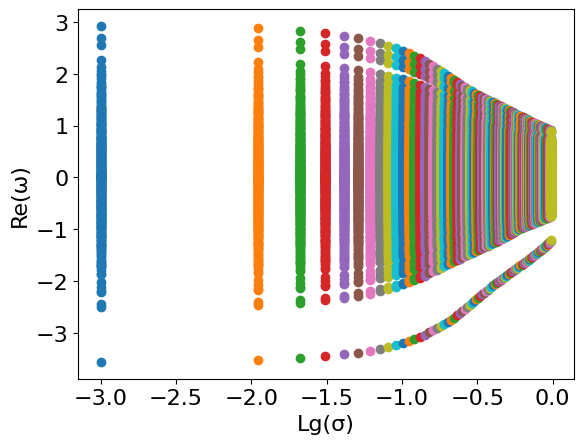

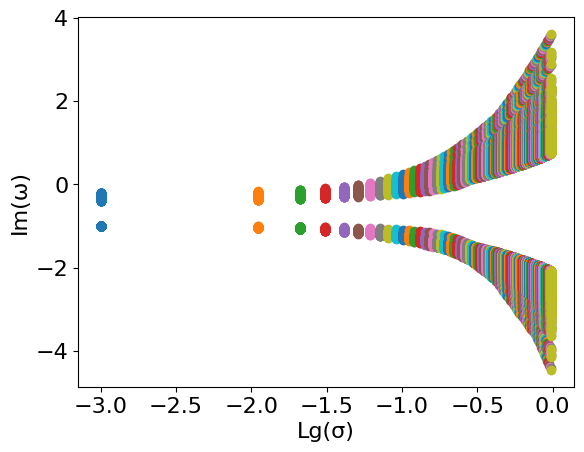

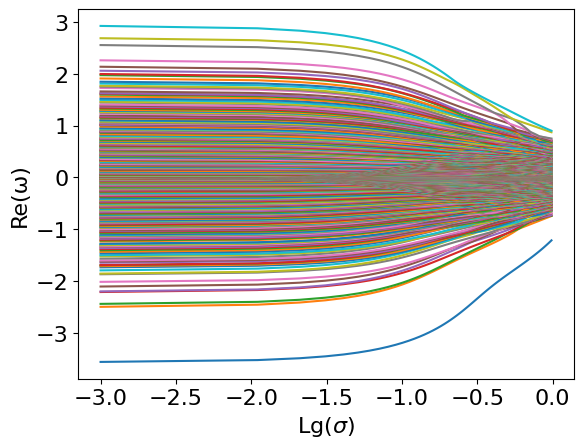

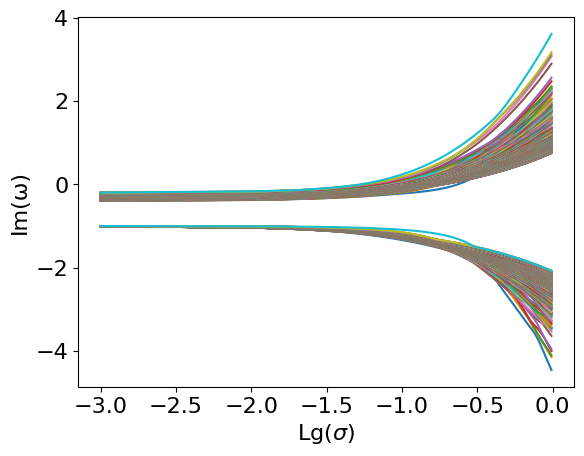

In [2]:
"""Ввод библиотек"""
import math
import random

import numpy as np
from numpy import linalg as LA
from scipy import linalg as LA2
import matplotlib.pyplot as plt
import networkx as nx
"""Ввод начальных условий и генерация сети"""
N = len(G1)
m = 2
p= 0.044
Gamma = 0.5
J = 0.5
sigm = np.arange(0.001, 0.99, 0.01)
logsigm = np.log10(sigm)
seedn = 18
#24

Delta = []
kappa = []
for i in range(N):
    Delta.append(random.uniform(-0.1, 0.1))
   # kappa.append(random.uniform(0.5 * Gamma, 0.8 * Gamma))
"""Иницилизация сети"""
Gamma = [random.uniform(0.2, 1.8) for i in range(N)]


#G = nx.erdos_renyi_graph(N, p, seed=18, directed=False)
G= G1
A = nx.adjacency_matrix(G)
#plt.figure(3)
#a = nx.draw(G,with_labels = True)
Gamma = [random.uniform(0.2, 0.4) for i in range(N)]

kappa = [1 for i in range(N)]
#Gamma =  [0 for i in range(N)] #[random.uniform(0.2, 1.8) for i in range(N)] #
k  = np.sum(A, axis=1)
"""Заполнение матрицы коэффициентов"""

solr = []
soli = []
for z in range(len(sigm)):
    Matrixcoef = [[0 for j in range(2*N)] for i in range(2*N)]

    for i in range(0, N):
        for j in range(0, N):
            Matrixcoef[i][j] = 1j*J * A[i, j]

    for i in range(0, N):
        Matrixcoef[i][i] = -1j*Delta[i]-kappa[i]

    for i in range(0, N):
        Matrixcoef[i][i+N]=-1j * np.sqrt(k[i])

    for i in range(N, 2*N):
        Matrixcoef[i][i-N] = 1j*sigm[z] *np.sqrt(k[i-N])

    for i in range(N, 2*N):
        Matrixcoef[i][i] = -Gamma[i - N]

        """Решение"""
    eg = LA.eigvals(Matrixcoef)*(1j)


    reg = [x.real for x in eg]
    ieg = [x.imag for x in eg]

    reg = np.sort(np.array(reg))
    ieg = np.sort(np.array(ieg))

    #print(type(reg))

    for i in range (len(ieg)):
        if abs(ieg[i]) < 1e-6:
            ieg[i]=0

    sigmas = [logsigm[z]]*len(reg)

    solr.append(reg)
    soli.append(ieg)

    plt.figure(1)

    font = { 'size': 16}
    plt.rc('font', **font)

    plt.scatter(sigmas, reg)
    plt.xlabel("Lg(σ)")
    plt.ylabel("Re(ω)")
    plt.figure(2)
    plt.scatter(sigmas, ieg)
    plt.xlabel("Lg(σ)")
    plt.ylabel("Im(ω)")

    #plt.legend()



newrsol = np.array(solr)
newisol = np.array(soli)

#for i in range (2*N):
#    newrsol[i] = np.sort(newrsol[i])
 #   newisol[i] = np.sort(newisol[i])


newrsol = newrsol.transpose()
newisol = newisol.transpose()
print(newisol[0])


print(newisol[0])

for i  in range (2*N):
    plt.figure(4)
    plt.plot(logsigm, newrsol[i])
    plt.xlabel("Lg($σ$)")
    plt.ylabel("Re(ω)")
    plt.figure(5)
    plt.plot(logsigm, newisol[i])
    plt.xlabel("Lg($σ$)")
    plt.ylabel("Im(ω)")


plt.show()
